# Add
## Home / Away Rank


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cfb_wk9.csv')

In [3]:
df

,Rk,Wk,Winner,Pts,Unnamed: 4,Loser,Pts.1,Notes
0,1,1,Florida Atlantic,43,NaN,Charlotte,13,NaN
1,2,1,Florida State,47,NaN,Duquesne,7,NaN
2,3,1,Illinois,38,NaN,Wyoming,6,NaN
3,4,1,Nevada,23,@,New Mexico State,12,NaN
4,5,1,Nevada-Las Vegas,52,NaN,Idaho State,21,NaN
...,...,...,...,...,...,...,...,...
495,496,9,Boise State,19,@,Air Force,14,NaN
496,497,9,Bowling Green,34,@,Central Michigan,18,NaN
497,498,9,Buffalo,34,NaN,Toledo,27,NaN
498,499,9,(21) Cincinnati,29,@,Southern Methodist,27,NaN


In [4]:
df = df.drop(columns=['Rk', 'Notes'])

In [5]:
df.shape

(500, 6)

In [6]:
location = df['Unnamed: 4']

In [7]:
# home = []

# for index, row in df.iterrows():
#     location = (row['Unnamed: 4'])
#     if (location == 'N'):
#         home.append(0)
#     elif (location == '@'):
#         home.append(row['Loser'])
#     else:
#         home.append(row['Winner'])



In [8]:
# df['home_team'] = home

In [9]:
df

,Wk,Winner,Pts,Unnamed: 4,Loser,Pts.1,home_team
0,1,Florida Atlantic,43,NaN,Charlotte,13,Florida Atlantic
1,1,Florida State,47,NaN,Duquesne,7,Florida State
2,1,Illinois,38,NaN,Wyoming,6,Illinois
3,1,Nevada,23,@,New Mexico State,12,New Mexico State
4,1,Nevada-Las Vegas,52,NaN,Idaho State,21,Nevada-Las Vegas
...,...,...,...,...,...,...,...
495,9,Boise State,19,@,Air Force,14,Air Force
496,9,Bowling Green,34,@,Central Michigan,18,Central Michigan
497,9,Buffalo,34,NaN,Toledo,27,Buffalo
498,9,(21) Cincinnati,29,@,Southern Methodist,27,Southern Methodist


In [12]:
# away = []
# for index, row in df.iterrows():
#     if (row['home_team'] == row['Winner']):
#         away.append(row['Loser'])
#     elif (row['home_team'] == row['Loser']):
#         away.append(row['Winner'])
#     else:
#         away.append(3)

In [14]:
# df['away'] = away

In [15]:
# df

,Wk,Winner,Pts,Unnamed: 4,Loser,Pts.1,home_team,away
0,1,Florida Atlantic,43,NaN,Charlotte,13,Florida Atlantic,Charlotte
1,1,Florida State,47,NaN,Duquesne,7,Florida State,Duquesne
2,1,Illinois,38,NaN,Wyoming,6,Illinois,Wyoming
3,1,Nevada,23,@,New Mexico State,12,New Mexico State,Nevada
4,1,Nevada-Las Vegas,52,NaN,Idaho State,21,Nevada-Las Vegas,Idaho State
...,...,...,...,...,...,...,...,...
495,9,Boise State,19,@,Air Force,14,Air Force,Boise State
496,9,Bowling Green,34,@,Central Michigan,18,Central Michigan,Bowling Green
497,9,Buffalo,34,NaN,Toledo,27,Buffalo,Toledo
498,9,(21) Cincinnati,29,@,Southern Methodist,27,Southern Methodist,(21) Cincinnati


In [25]:
df.shape

(500, 8)

In [19]:
# homes = df['home_team']

In [27]:
# homes.value_counts()

0                      9
Auburn                 5
Georgia Tech           5
Indiana                5
Air Force              5
                      ..
(12) Oklahoma State    1
(13) Utah              1
Tennessee              1
(22) Wake Forest       1
Baylor                 1
Name: home_team, Length: 205, dtype: int64

In [28]:
# home_rank = []
# for i in homes:
# #     if(i[1] == "("):
#         print(i[0])

In [9]:
df = df.drop(columns=['Unnamed: 4'])

In [10]:
df

,Wk,Winner,Pts,Loser,Pts.1,home_team
0,1,Florida Atlantic,43,Charlotte,13,Florida Atlantic
1,1,Florida State,47,Duquesne,7,Florida State
2,1,Illinois,38,Wyoming,6,Illinois
3,1,Nevada,23,New Mexico State,12,New Mexico State
4,1,Nevada-Las Vegas,52,Idaho State,21,Nevada-Las Vegas
...,...,...,...,...,...,...
495,9,Boise State,19,Air Force,14,Air Force
496,9,Bowling Green,34,Central Michigan,18,Central Michigan
497,9,Buffalo,34,Toledo,27,Buffalo
498,9,(21) Cincinnati,29,Southern Methodist,27,Southern Methodist


In [11]:
new_df = df.copy()

In [12]:
home_results = []
for index, row in new_df.iterrows():
    if (row['home_team'] == row['Winner']):
        home_results.append(0)
    elif (row['home_team'] == row['Loser']):
        home_results.append(1)
    else:
        home_results.append(3)

In [13]:
new_df.shape

(500, 6)

In [14]:
new_df['home_results'] = home_results

In [15]:
new_df

,Wk,Winner,Pts,Loser,Pts.1,home_team,home_results
0,1,Florida Atlantic,43,Charlotte,13,Florida Atlantic,0
1,1,Florida State,47,Duquesne,7,Florida State,0
2,1,Illinois,38,Wyoming,6,Illinois,0
3,1,Nevada,23,New Mexico State,12,New Mexico State,1
4,1,Nevada-Las Vegas,52,Idaho State,21,Nevada-Las Vegas,0
...,...,...,...,...,...,...,...
495,9,Boise State,19,Air Force,14,Air Force,1
496,9,Bowling Green,34,Central Michigan,18,Central Michigan,1
497,9,Buffalo,34,Toledo,27,Buffalo,0
498,9,(21) Cincinnati,29,Southern Methodist,27,Southern Methodist,1


In [16]:
wins = new_df['Winner']

In [17]:
winners = []
for i in wins:
    if (i[2] == ")"):
        winners.append(i[1:2])
        if(i[1] == "("):
            winners.append(i[1:3])
    else:
        winners.append(99)
    

In [18]:
len(winners)

500

In [19]:
new_df['win_rank'] = winners

In [20]:
lose = new_df['Loser']

In [21]:
losers = []
for i in lose:
    if (i[2] == ")"):
        losers.append(i[1:2])
        if(i[1] == "("):
            losers.append(i[1:3])
    else:
        losers.append(99)

In [22]:
len(losers)

500

In [23]:
new_df['lose_rank'] = losers

In [24]:
new_df = new_df.drop(columns=['Winner', 'Loser', 'home_team'])

In [25]:
new_df

,Wk,Pts,Pts.1,home_results,win_rank,lose_rank
0,1,43,13,0,99,99
1,1,47,7,0,99,99
2,1,38,6,0,99,99
3,1,23,12,1,99,99
4,1,52,21,0,99,99
...,...,...,...,...,...,...
495,9,19,14,1,99,99
496,9,34,18,1,99,99
497,9,34,27,0,99,99
498,9,29,27,1,99,99


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [27]:
df3 = new_df

In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Wk            500 non-null    int64 
 1   Pts           500 non-null    int64 
 2   Pts.1         500 non-null    int64 
 3   home_results  500 non-null    int64 
 4   win_rank      500 non-null    object
 5   lose_rank     500 non-null    object
dtypes: int64(4), object(2)
memory usage: 23.6+ KB


In [90]:
wins = df3['win_rank']

winners = pd.to_numeric(wins) 

In [92]:
df3['win_rank'] = winners

In [94]:
lose = df3['lose_rank']

losers = pd.to_numeric(lose) 

In [95]:
df3['lose_rank'] = losers

In [96]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Wk            500 non-null    int64
 1   Pts           500 non-null    int64
 2   Pts.1         500 non-null    int64
 3   home_results  500 non-null    int64
 4   win_rank      500 non-null    int64
 5   lose_rank     500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [61]:
# oh = [[10, 0, 13, 2]]
# osu = pd.DataFrame(oh, columns=['Wk', 'home_results', 'win_rank', 'lose_rank'])
# osu

pn = [[10, 30, 0, 13, 2]]
pen = pd.DataFrame(pn, columns=['Wk', 'Pts', 'home_results', 'win_rank', 'lose_rank'])
pen

,Wk,Pts,home_results,win_rank,lose_rank
0,10,30,0,13,2


In [62]:
# ut = [[10, 0, 3, 19]]
# tenn = pd.DataFrame(ut, columns=['Wk', 'home_results', 'win_rank', 'lose_rank'])
# tenn

# ky = [[10, 37, 0, 3, 19]]
# ken = pd.DataFrame(ky, columns=['Wk', 'Pts', 'home_results', 'win_rank', 'lose_rank'])
# ken

In [63]:
df3

,Wk,Pts,Pts.1,home_results,win_rank,lose_rank
0,1,43,13,0,99,99
1,1,47,7,0,99,99
2,1,38,6,0,99,99
3,1,23,12,1,99,99
4,1,52,21,0,99,99
...,...,...,...,...,...,...
495,9,19,14,1,99,99
496,9,34,18,1,99,99
497,9,34,27,0,99,99
498,9,29,27,1,99,99


In [97]:
df3.corr()

,Wk,Pts,Pts.1,home_results,win_rank,lose_rank
Wk,1.000000,-0.218743,0.180504,0.089044,-0.062909,-0.006077
Pts,-0.218743,1.000000,0.109307,-0.116091,-0.107362,0.062930
Pts.1,0.180504,0.109307,1.000000,0.140962,0.089717,-0.128621
home_results,0.089044,-0.116091,0.140962,1.000000,-0.007406,0.013346
win_rank,-0.062909,-0.107362,0.089717,-0.007406,1.000000,0.048159
lose_rank,-0.006077,0.062930,-0.128621,0.013346,0.048159,1.000000


In [100]:
y = df3['Pts']
X = df3.drop(columns=['Pts', 'Pts.1'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.01, random_state=2)

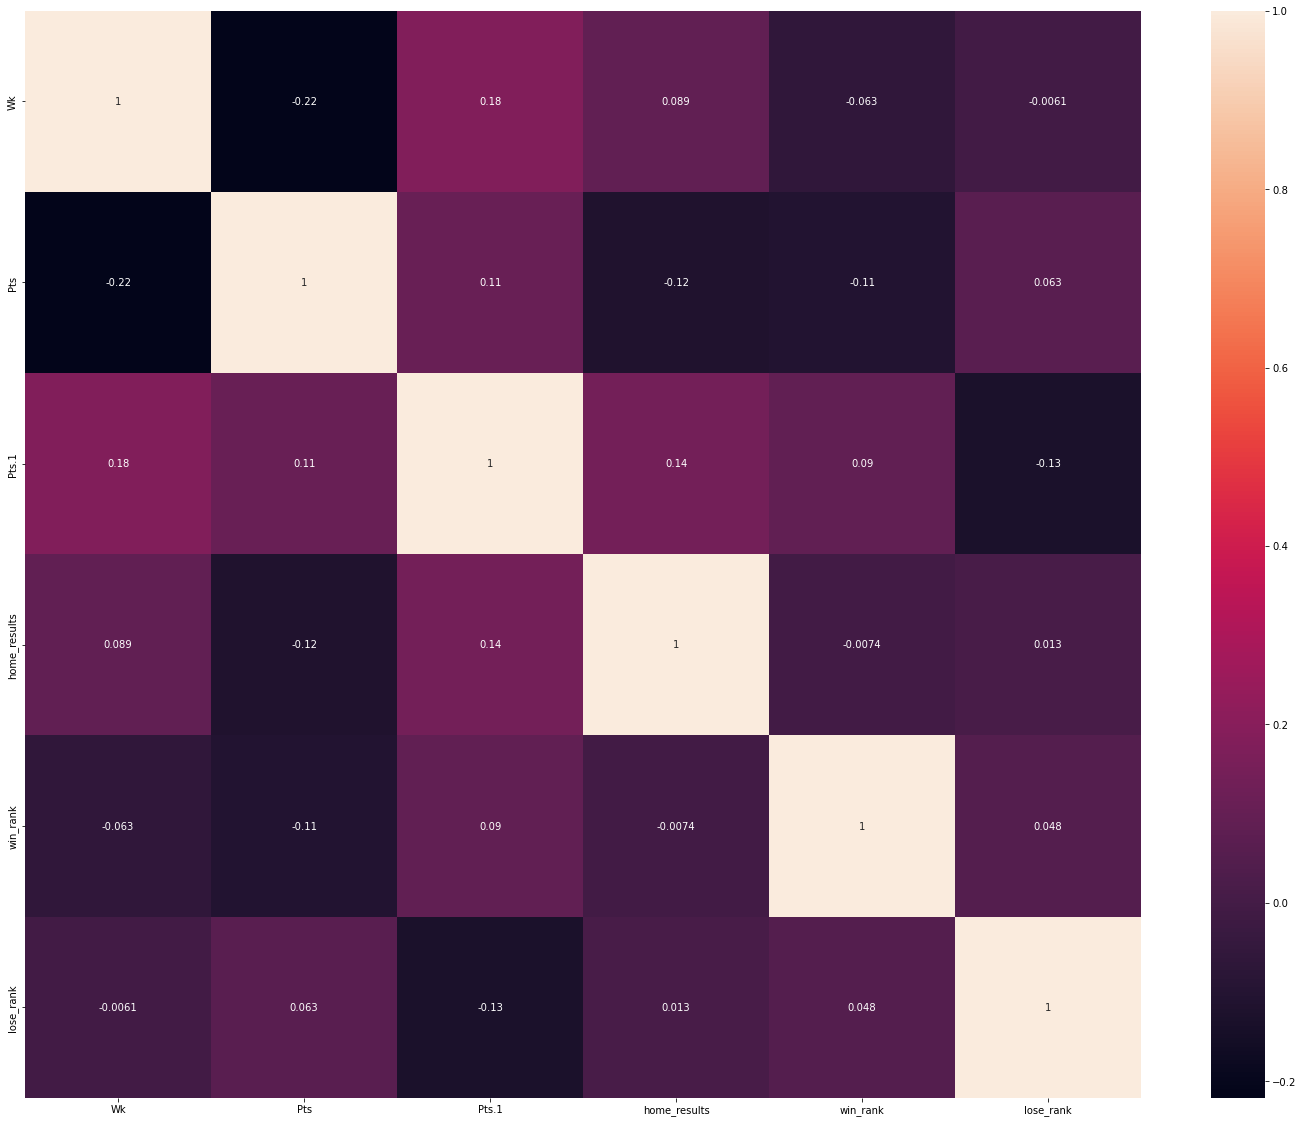

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
sns.heatmap(df3.corr(), annot=True)
plt.savefig("Heatmap.png")

In [99]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.2000


In [69]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5), n_estimators=299, random_state=42
)

In [70]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

In [71]:
y_pred = regr_2.predict(pen)

In [72]:
y_pred


array([12.43023256])

In [ ]:
# Ohio State University: 34
# Penn State: 18.373
# 34+18 = 52
# 34-18 = 16

# Spread: Ohio State -15.5
# Over/under: 61

# tennessee 36.57
# kentucky 26

In [ ]:
# tennessee 36.57
# kentucky 26

# 37 + 26 = 63

In [ ]:
# Kentucky	+12.5 -105
# Tennessee	-12.5 -115
# over under 63.5 -110

## vw picks:
## tenn 30
## ken 16



rt picks:
tenn 45
ken 10